In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install lightkurve

  Using cached lightkurve-2.0.9-py3-none-any.whl (240 kB)
  Using cached astropy-4.2.1-cp38-cp38-win_amd64.whl (6.2 MB)
  Using cached uncertainties-3.1.5-py2.py3-none-any.whl (246 kB)
Processing c:\users\rashi maru\appdata\local\pip\cache\wheels\38\a3\2c\65f38691eef2c25e74f1ab45186b67e09cea7b59696fd67696\astroquery-0.4.1-py3-none-any.whl
  Using cached memoization-0.3.2-py3-none-any.whl (38 kB)
  Using cached pyerfa-1.7.3-cp38-cp38-win_amd64.whl (328 kB)
  Attempting uninstall: astropy
    Found existing installation: astropy 4.0.2
    Uninstalling astropy-4.0.2:
      Successfully uninstalled astropy-4.0.2


===**Kepler**===

In [4]:
from lightkurve import search_targetpixelfile
pixelfile=search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');
#KIC 8462852 is Tabby's star
#Every year has 4 quarters, we are looking at 4th year i.e 16th quarter of kepler mission
#A bit mask can help you turn specific bits on, turn others off, or just collect data from an integer about which bits are
#on or off

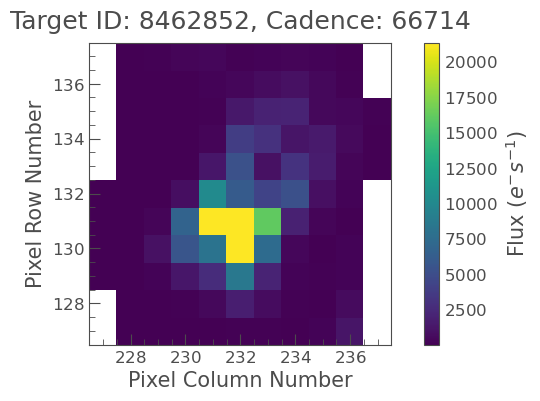

In [5]:
pixelfile.plot(frame=1);  #plotting fram 1

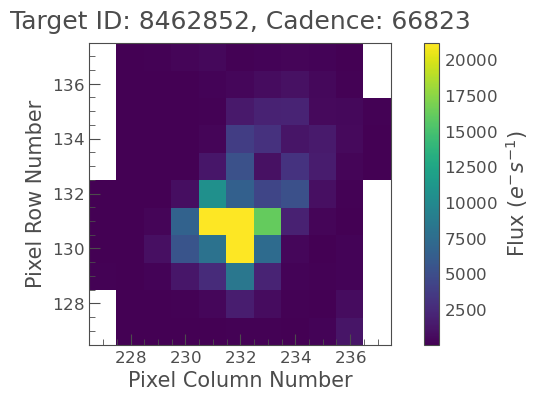

In [8]:
pixelfile.plot(frame=100);  #plotting frame 100

In [9]:
#taking the above pixel file and converting to lightcurve file
lc=pixelfile.to_lightcurve(aperture_mask='all'); 
lc
#aperture_mask used to visualize better when analyzing; its an advanced technique used in astronomy to make the 
#image slightly better to analyse easily 

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
1472.1177793449679,258645.03125,18.723051071166992,232.4673225194163,131.64635857207662,66713,0
1472.1382122338982,258660.046875,18.72334861755371,232.46713830837382,131.6455330726855,66714,0
1472.1586449230672,258690.078125,18.723417282104492,232.46697760340683,131.64547910884713,66715,0
1472.1790778124705,258683.328125,18.72397232055664,232.4667835196477,131.6450059544145,66716,0
1472.1995106019822,258655.40625,18.723506927490234,232.46657663040287,131.64489905025656,66717,0
1472.2199432917332,258663.15625,18.723569869995117,232.46699749841542,131.64502409968173,66718,0
1472.2403761816604,258686.71875,18.724145889282227,232.46669498310285,131.64451788212853,66719,0
1472.2608089718124,258663.28125,18.724172592163086,232.4666826625352,131.6445098127141,66720,0


In [10]:
#specific time of observation
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
 1557.95849016]>

In [11]:
#flux i.e brightness that the star was emitting
lc.flux

<Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
           258865.6 ] electron / s>

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

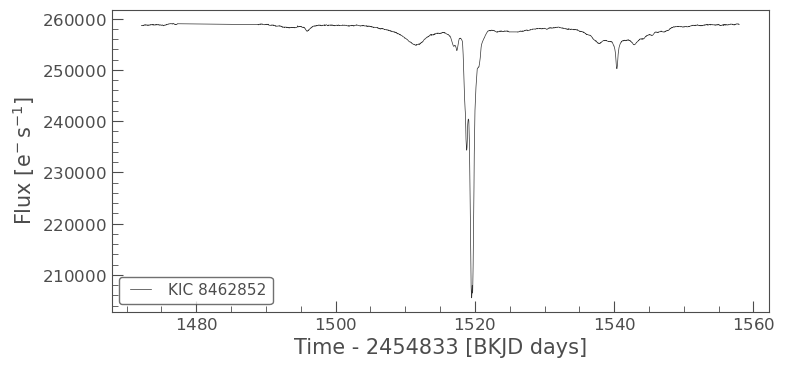

In [12]:
#plotting Boyajian's Star a.k.a Tabby's star
lc.plot()

In [15]:
pixelFile=search_targetpixelfile("KIC 6922244", quarter=4).download_all()

In [20]:
# First we open a Target Pixel File from MAST
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [21]:
lc.meta['MISSION']

'Kepler'

In [22]:
lc.meta['QUARTER']

4

In [23]:
# In a light curve, there is only one flux point for every time stamp:
lc.time

<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]>

In [24]:
lc.flux

<Quantity [43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
           43151.562] electron / s>

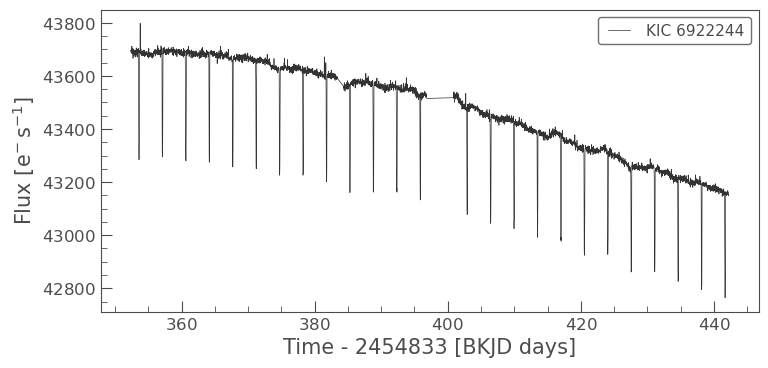

In [25]:
%matplotlib inline
lc.plot();

In [26]:
#from above plot we see that its periodic but also star is getting dimmer and dimmer. This could be just a variable star that goes through ups and downs- a lot of stars do that except Sun- it is very mild in that sense. another reason could be because of the motion of telescope. If we see at around 400- there is nothing there; this could probably be because telescope was shifting or moving around

#So, let's flatten the graph to make it better to analyze

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

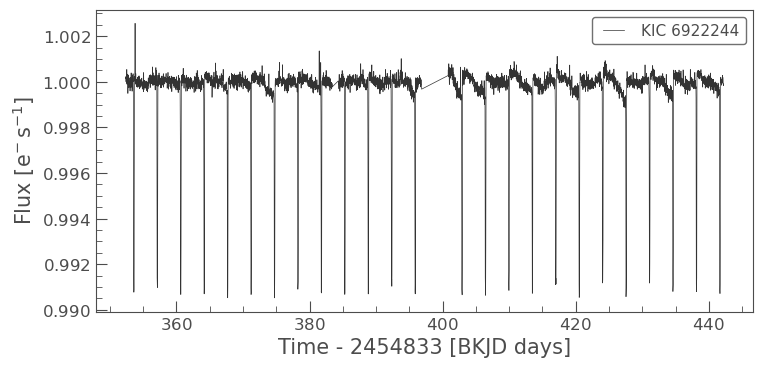

In [27]:
flat_lc=lc.flatten(window_length=401)
flat_lc.plot()

In [28]:
# In the graph above, we can see something periodic is happening, planet periodically crosses the star. We can now start guessing how often the planet crosses the star and by how much luminosity the star’s brightness decreases (Flux: y-axis) which will help us to identify size of the planet.

In [29]:
# 3.5225 days for planet to cross the star

#so with this periodic grpah, take each of these observations and fold it on top of one another i.e put each of the lines in the graph together
# this command will show how planet passes infront of a star:-

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

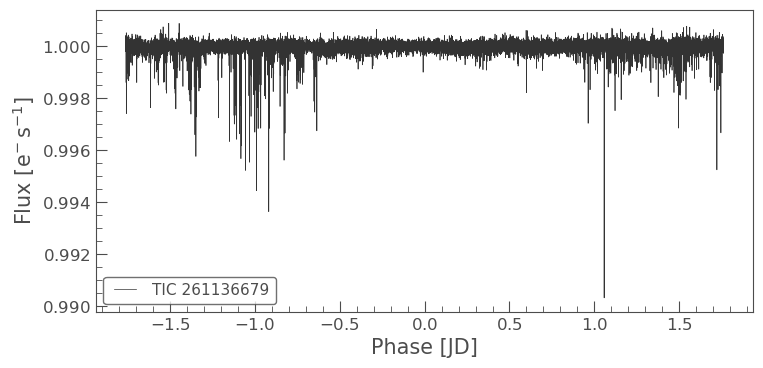

In [119]:
folded_lc=flat_lc.fold(period=3.522)
folded_lc.plot()

In [31]:
#from above graph, we see a dip i.e a curve. With this graph we get a lot of data about the planet including its size based on changes in luminosity and other information where scientists can look how fast this curve changes

In [32]:
#in the above code we had the exact period i.e 3.5225 days. If we had written 1 or 2 days:-

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

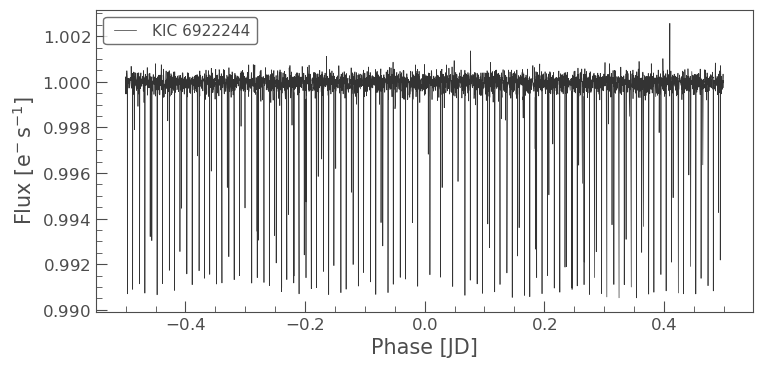

In [33]:
folded_lc=flat_lc.fold(period=1)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

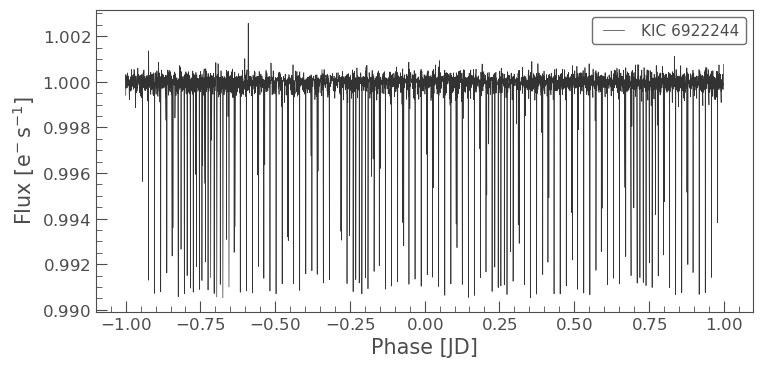

In [34]:
folded_lc=flat_lc.fold(period=2)
folded_lc.plot()

In [35]:
#hence to extract information from the graph we need exact period. There is a way to get the exact period. In astronomy, the way to find period is by using an interesting function called as periodogram
#periodogram produces a frequency graph all the repetitive patterns in a graph and tells which one is most likely to be periodic

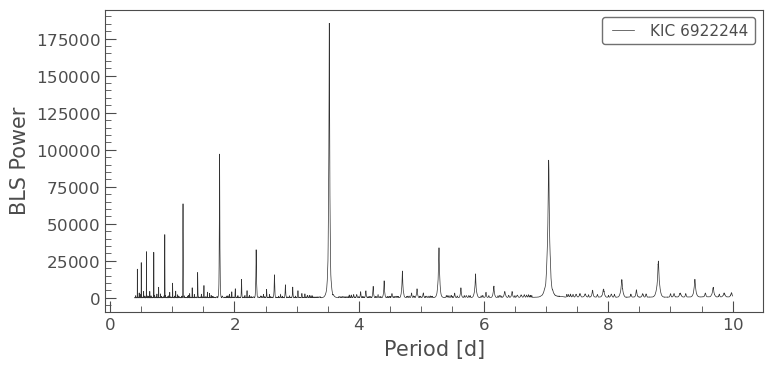

In [50]:
#by looking the graph we got above flat_lc, we can say that period is somewhere between 0 and 10 days, so considering
#0.4 and 10 with difference of 0.001 days
periodogram=flat_lc.to_periodogram(method="bls", period=np.arange(0.4, 10, 0.001))   
periodogram.plot();

In [52]:
# This graph above shows all the frequncies with the highest frequency as the most repetitive frequency of all the repetitions in the graph flat_lc
# We observe that its between 3 and 4 so we will run another command i.e period_at_max_power which will give us best fit for the graph

In [53]:
best_fit_period=periodogram.period_at_max_power
print("Best fit period: {:.5f}".format(best_fit_period))

Best fit period: 3.52200 d


In [54]:
#so we take this best fit period and get folded_lc plot

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

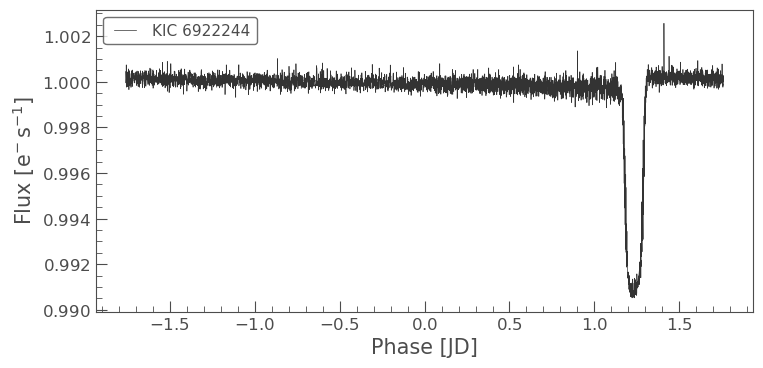

In [56]:
folded_lc=flat_lc.fold(period=3.522)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

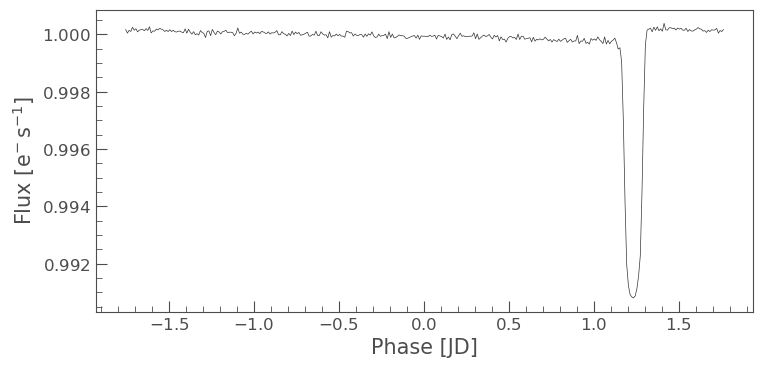

In [61]:
#to read the grpah better, we can reduces the no. of bins:
binned_lc=folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

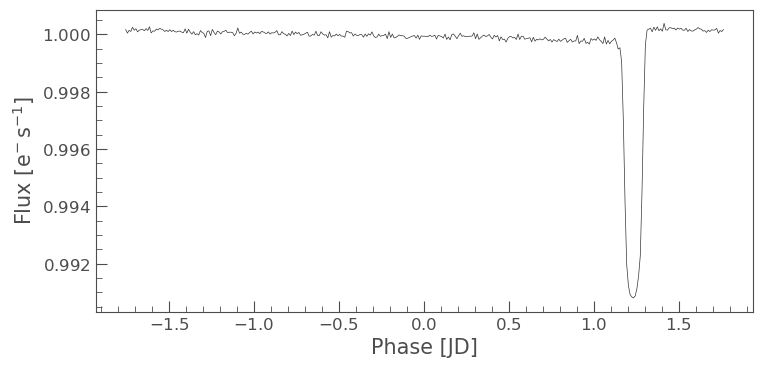

In [62]:
remove_nan_lc=binned_lc.remove_nans()  #removes outliers(unusual parameters)
remove_nan_lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

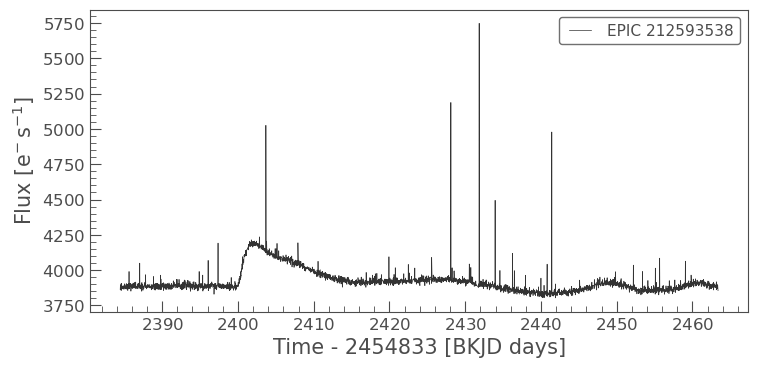

In [63]:
#to find and look at supernova and identify them when you are actually seeing them
tpf=search_targetpixelfile("EPIC 212593538", campaign=6).download()
lc=tpf.to_lightcurve(aperture_mask='all')
lc.plot()

In [64]:
#in the graph above, at around 2400(x-axis) we see a rise which is what supernova might look like in unprocessed data. This is actually an image from a galaxy, not from a star

===**TESS**===

In [66]:
from lightkurve import search_targetpixelfile
import lightkurve as lk

In [92]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

In [93]:
tpf.mission

'TESS'

In [94]:
tpf.targetid  # TESS Input Catalog (TIC) Identifier

261136679

In [95]:
tpf.sector  # TESS Observation Sector

1

In [96]:
tpf.camera  # TESS Camera Number

4

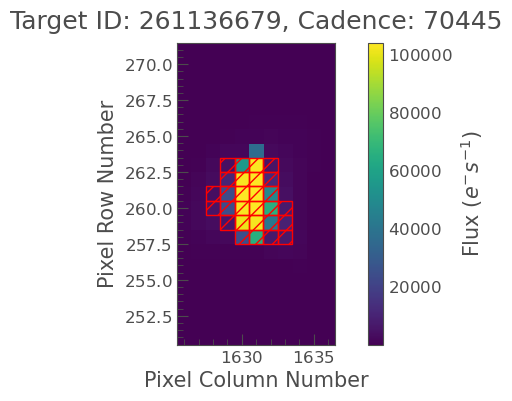

In [97]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

<AxesSubplot:title={'center':'Target ID: 261136679, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

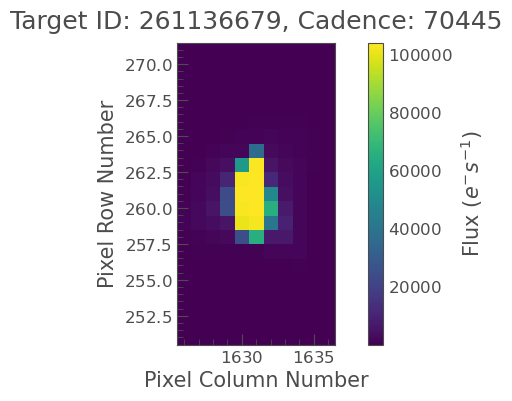

In [98]:
tpf.plot()

In [99]:
lc = tpf.to_lightcurve()

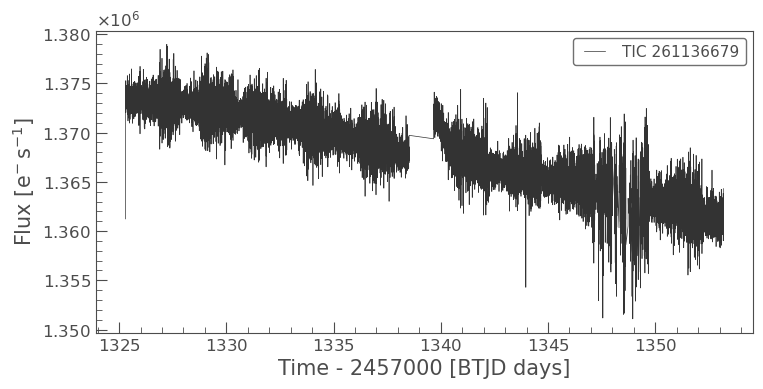

In [100]:
lc.plot();

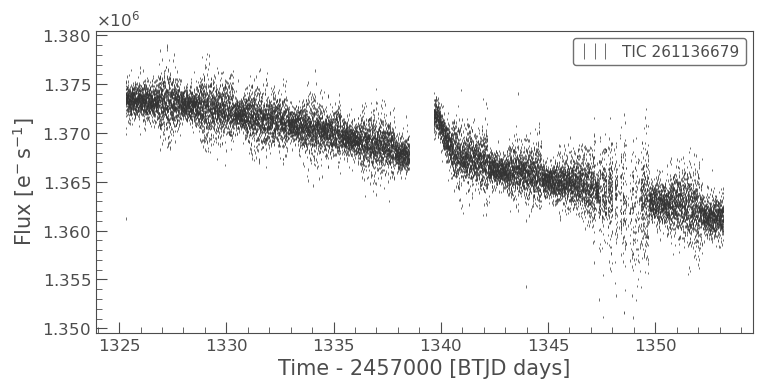

In [101]:
lc.errorbar();

In [102]:
# This above graph looks pretty good, but we can improve things by creating a new aperture.

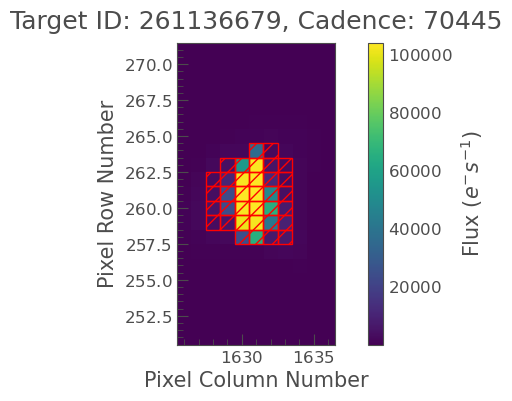

In [103]:
# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [104]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

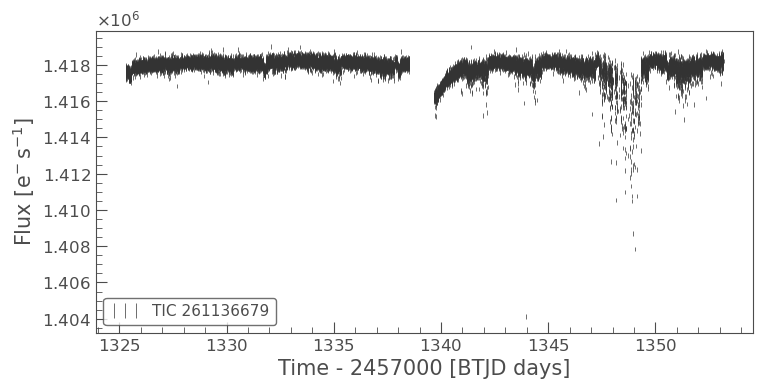

In [105]:
lc.errorbar();

In [106]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


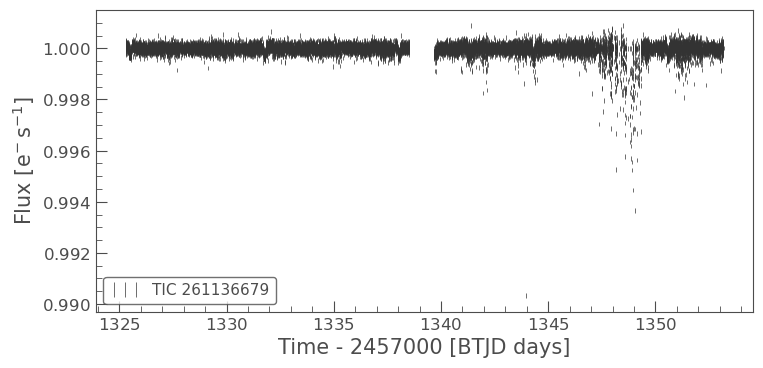

In [107]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

In [121]:
flat_lc.remove_outliers(sigma=6)  #sigma concept from Normal Distribution(Statistics)

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float64,float64,float64,float64,int32,int32
1325.2969832846081,1.0002738983835233,8.907197746773538e-05,1631.1982494850224,261.18216188220487,70445,0
1325.2983721541343,1.0001765434901042,8.906359941821887e-05,1631.170857205444,261.1410318847111,70446,0
1325.2997610236596,1.000110670272078,8.906220759941343e-05,1631.1700675843201,261.1354957099914,70447,0
1325.3011498931862,1.0000429453187045,8.90573872656311e-05,1631.1695867483577,261.1215584550424,70448,0
1325.3025387628288,1.0000054673663485,8.905556487210121e-05,1631.1625266800818,261.1213433526653,70449,0
1325.303927632354,1.0001130509370308,8.906061812276682e-05,1631.1616518172766,261.1204690966588,70450,0
1325.3053165019971,1.000014638407955,8.905664820203643e-05,1631.1657440889358,261.11427116516705,70451,0
1325.3067053715233,1.0000586417632882,8.905932000881048e-05,1631.1638990800284,261.11936131998266,70452,0


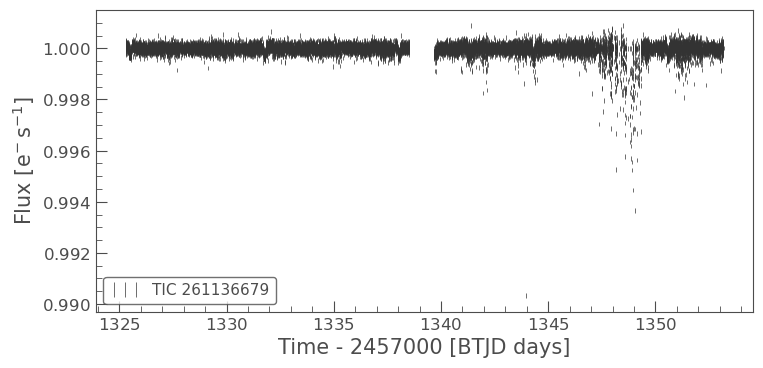

In [122]:
flat_lc.errorbar();

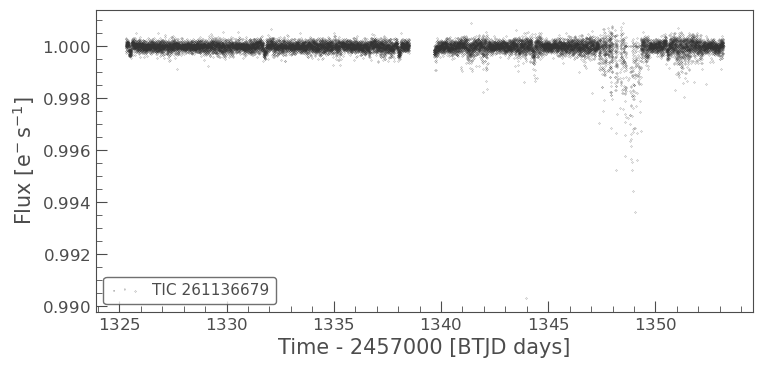

In [123]:
flat_lc.scatter(s=0.1);  

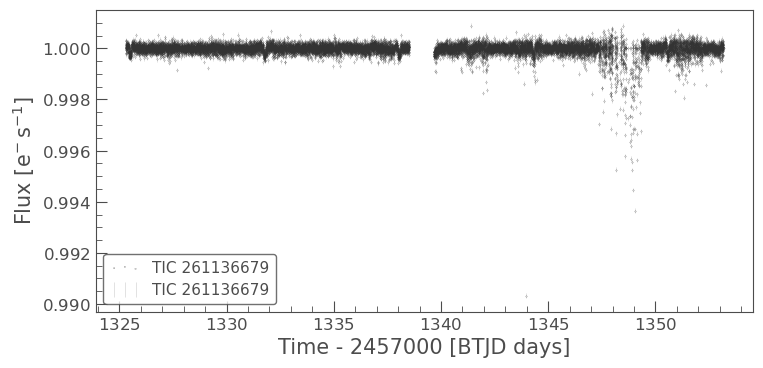

In [124]:
ax = flat_lc.scatter(s=0.1)
flat_lc.errorbar(ax=ax, alpha=0.2);  #alpha determines the transparency

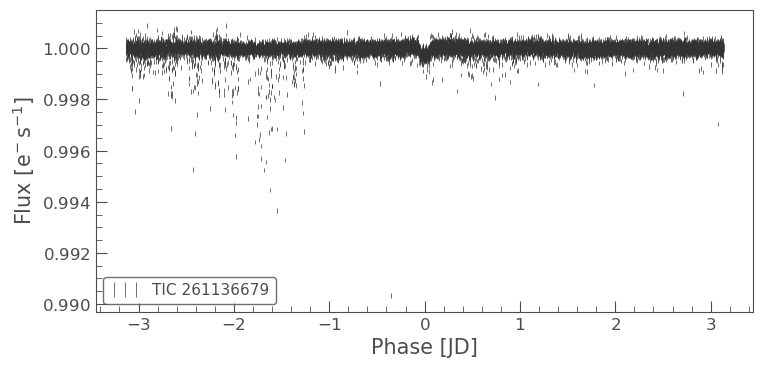

In [127]:
# fold the data at the exoplanet orbital period and see if a transit can be seen
folded_lc = flat_lc.fold(period=6.27, epoch_time=1325.504)
folded_lc.errorbar();

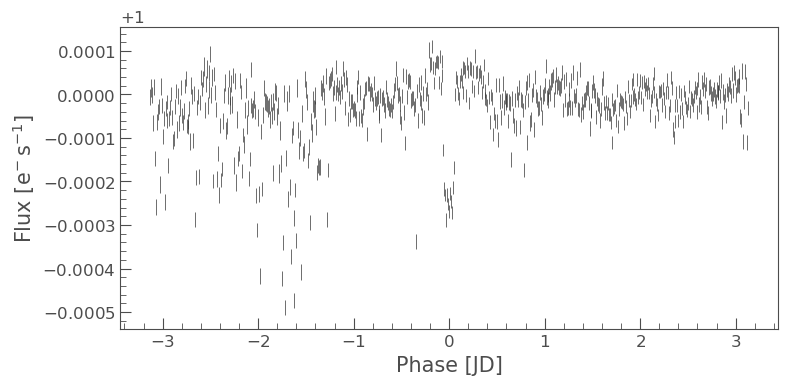

In [134]:
binned_lc = folded_lc.bin(time_bin_size=0.01)  
binned_lc.errorbar();